## Dans ce devoir, nous allons aborder les sujets suivants:

* Analyse factorielle
* Types d'analyse factorielle
* Déterminer le nombre de facteurs
* Analyse factorielle Vs. Analyse des composants principaux
* Analyse factorielle en python
* Test d'adéquation
* Interpréter les résultats
* Avantages et inconvénients de l'analyse factorielle
* Conclusion

##  Analyse factorielle
L'analyse factorielle est un modèle statistique linéaire. Il est utilisé pour expliquer la variance entre la variable observée et condenser un ensemble de la variable observée dans la variable non observée appelée facteurs. Les variables observées sont modélisées comme une combinaison linéaire de facteurs et de termes d'erreur (Source). Le facteur ou la variable latente est associé à de multiples variables observées, qui ont des modèles de réponses communs. Chaque facteur explique une quantité particulière de variance dans les variables observées. Il aide à interpréter les données en réduisant le nombre de variables.

## Hypothèses:
1. Il n'y a pas de valeurs aberrantes dans les données.
2. La taille de l'échantillon doit être supérieure au facteur.
3. Il ne devrait pas y avoir de multicolinéarité parfaite.
4. Il ne devrait pas y avoir d'homoscédasticité entre les variables.

## Analyse factorielle Vs. Analyse des composants principaux
* Les composantes de l'ACP expliquent la quantité maximale de variance tandis que l'analyse factorielle explique la covariance des données.
* Les composantes de l'ACP sont entièrement orthogonales les unes par rapport aux autres, tandis que l'analyse factorielle ne nécessite pas que les facteurs soient orthogonaux.
* La composante PCA est une combinaison linéaire de la variable observée alors qu'en FA, les variables observées sont des combinaisons linéaires de la variable ou du facteur non observé.
* Les composants PCA ne sont pas interprétables. En FA, les facteurs sous-jacents sont étiquetables et interprétables.
* L'ACP est une sorte de méthode de réduction de dimensionnalité alors que l'analyse factorielle est la méthode des variables latentes.
*L'ACP est un type d'analyse factorielle. L'ACP est observationnelle alors que l'AF est une technique de modélisation.

## Sources:
1. [le site Quora -> https://www.quora.com/What-are-the-main-differences-between-a-principal-component-analysis-and-a-factor-analysis](https://www.quora.com/What-are-the-main-differences-between-a-principal-component-analysis-and-a-factor-analysis)
2. [le site datacamp -> https://www.datacamp.com/community/tutorials/introduction-factor-analysis](https://www.datacamp.com/community/tutorials/introduction-factor-analysis)
3. [le openclassrooms ->https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees](https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees)

## Analyse factorielle en python à l'aide du package factor_analyzer et 
Importer les bibliothèques requises

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from functions import *

## Chargement et nettoyage de donnée

In [2]:
data = pd.read_csv('my_courses.csv', decimal='.',  index_col=0 )

In [3]:
data_afc = data[
    ["inscription","progression","duree","difficulte","nbChapitres","nbEvaluations","idCours"]
]

## la préparation des données pour l'AFC

In [4]:
# Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
data_afc = data_afc.fillna( data_afc.mean() )

In [5]:
data_afc.describe()

,inscription,progression,duree,difficulte,nbChapitres,nbEvaluations,idCours
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,5.300000e+01
mean,522.211538,45.673077,14.769231,1.673077,16.538462,2.269231,3.878842e+06
std,308.142034,39.913233,11.454954,0.642146,10.221511,1.331792,1.688720e+06
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.998000e+04
25%,346.000000,9.000000,8.000000,1.000000,10.000000,1.000000,3.013856e+06
50%,483.000000,28.000000,10.000000,2.000000,15.000000,2.000000,4.297166e+06
75%,727.000000,100.000000,20.000000,2.000000,20.000000,3.000000,4.568596e+06
max,1288.000000,100.000000,50.000000,3.000000,51.000000,5.000000,6.692406e+06


In [6]:
X = data_afc.iloc[:, 1:]
# ou data.index pour avoir les intitulés
features = data.columns
names = data["idCours"] 

In [7]:
# Suppression des lignes de valeurs manquantes
data_afc.dropna(inplace=True)

In [8]:
data_afc.std()

inscription      3.081420e+02
progression      3.991323e+01
duree            1.145495e+01
difficulte       6.421465e-01
nbChapitres      1.022151e+01
nbEvaluations    1.331792e+00
idCours          1.688720e+06
dtype: float64

In [9]:
data_afc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, Réalisez_une_analyse_exploratoire_de_données to Créez_votre_première_application_connectée_en_C
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   inscription    53 non-null     float64
 1   progression    53 non-null     float64
 2   duree          53 non-null     float64
 3   difficulte     53 non-null     float64
 4   nbChapitres    53 non-null     float64
 5   nbEvaluations  53 non-null     float64
 6   idCours        53 non-null     float64
dtypes: float64(7)
memory usage: 3.3+ KB


## Centrage et Réduction

In [10]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

## Test d'adéquation

Avant d'effectuer une analyse factorielle, nous devons évaluer la **«factorabilité»** de notre ensemble de données. La **factorabilité** signifie «pouvons-nous trouver les facteurs dans l'ensemble de données?». Il existe deux méthodes pour vérifier la factorabilité ou l'adéquation de l'échantillonnage:
* Test de Bartlett 
* Test de Kaiser-Meyer-Olkin
### Test de Bartlett 
Le test de sphéricité de Bartlett vérifie si les variables observées sont intercorrélées ou non en utilisant la matrice de corrélation observée avec la matrice d'identité. Si le test est statistiquement insignifiant, nous ne devons pas recourir à une analyse factorielle.

In [11]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(X)
chi_square_value, p_value

(105.28603826594045, 5.662126881857858e-16)

Dans ce test de Bartlett, la valeur p est sensiblement égale à 0. Le test était statistiquement significatif, indiquant que la matrice de corrélation observée n’est pas une matrice d’identité on peut le vérifier maintenant.

## Matrice de correlation

In [12]:
data_afc.corr()

,inscription,progression,duree,difficulte,nbChapitres,nbEvaluations,idCours
inscription,1.000000,0.290442,0.339338,0.074504,0.257902,0.062045,-0.408419
progression,0.290442,1.000000,-0.028052,-0.139227,-0.059197,-0.043205,-0.187387
duree,0.339338,-0.028052,1.000000,0.591052,0.781054,0.118785,-0.530187
difficulte,0.074504,-0.139227,0.591052,1.000000,0.437000,0.012973,-0.241362
nbChapitres,0.257902,-0.059197,0.781054,0.437000,1.000000,0.276126,-0.547328
nbEvaluations,0.062045,-0.043205,0.118785,0.012973,0.276126,1.000000,0.031165
idCours,-0.408419,-0.187387,-0.530187,-0.241362,-0.547328,0.031165,1.000000


## Test de Kaiser-Meyer-Olkin (KMO)

mesure la pertinence des données pour l'analyse factorielle. Il détermine l'adéquation pour chaque variable observée et pour le modèle complet. KMO estime la proportion de variance parmi toutes les variables observées. Une proportion plus faible est plus adaptée à l'analyse factorielle Les valeurs de KMO sont comprises entre 0 et 1. Une valeur de KMO inférieure à 0,6 est considérée comme inadéquate.

In [13]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data_afc)
kmo_all

array([0.68488331, 0.55286708, 0.66692669, 0.71680752, 0.65854926,
       0.33753609, 0.7555306 ])

In [14]:
kmo_model

0.6687606621794097

#### Le KMO global pour nos données est de **0.67**, ce qui n'est mal ici. Cette valeur indique que nous pouvons poursuivre votre analyse factorielle planifiée.

## Choix du nombre de facteurs

Pour choisir le nombre de facteurs, nous pouvons utiliser le **Kaiser criterion** et **scree plot**. Les deux sont basés sur des valeurs propres.

In [15]:
# Créer un objet d'analyse factorielle et effectuer une analyse factorielle
fa = FactorAnalyzer()
fa = FactorAnalyzer()
fa.fit(np.array(data_afc.iloc[:, 1:]))
# Vérifier les valeurs propres
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([2.62715241, 1.16907705, 1.01904334, 0.64229814, 0.36086515,
       0.18156391])

In [16]:
## Améliorons l'affichage
valeur_propre = pd.DataFrame({'Valeurs propres':eigen_values})
valeur_propre

,Valeurs propres
0,2.627152
1,1.169077
2,1.019043
3,0.642298
4,0.360865
5,0.181564


#### Ici, nous pouvons voir que pour 3 facteurs, les valeurs propres sont supérieures à un. Cela signifie que nous devons choisir seulement 3 facteurs (ou des variables non observées).

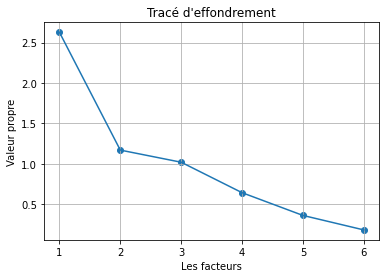

In [17]:
# Create scree plot using matplotlib
plt.scatter(range(1,data_afc.shape[1]), eigen_values)
plt.plot(range(1,data_afc.shape[1]), eigen_values)
plt.title('Tracé d\'effondrement')
plt.xlabel('Les facteurs')
plt.ylabel('Valeur propre')
plt.grid()
plt.show()

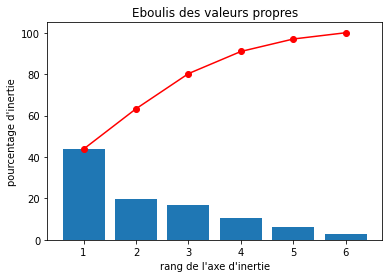

In [18]:
from functions import *
def display_scree_plot(v):
    scree = (v/600)*10000
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)
display_scree_plot(eigen_values)

La méthode de **tracé en éboulis trace(scree plot)** une ligne droite pour chaque facteur et ses valeurs propres. Nombre de valeurs propres supérieur à un considéré comme le nombre de facteurs.

Ici, nous pouvons voir que pour 5 facteurs, les valeurs propres sont supérieures à un. Cela signifie que nous devons choisir seulement 5 facteurs (ou des variables non observées).

## Effectuons une analyse factorielle

In [19]:
# Créer un objet d'analyse factorielle et effectuer une analyse factorielle
fa = FactorAnalyzer()
fa.set_params(n_factors=3, rotation="varimax")

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [20]:
fa.fit(data_afc)
fa.loadings_

array([[ 0.22928479,  0.04913759,  0.59570035],
       [-0.13760605, -0.02946831,  0.52843367],
       [ 0.93593916,  0.05291487,  0.16203971],
       [ 0.61504405, -0.03721217, -0.12173067],
       [ 0.80492248,  0.21817184,  0.15750858],
       [ 0.07239358,  0.99542025, -0.01546904],
       [-0.52176389,  0.04963359, -0.49820028]])

In [21]:
fa.loadings_[0]
features

Index(['inscription', 'progression', 'moyenneDeClasse', 'duree', 'difficulte',
       'nbChapitres', 'ratioQuizEvaluation', 'nbEvaluations',
       'derniereMiseAJour', 'idCours'],
      dtype='object')

In [22]:
from functions import *
# Cercle des corrélations
pcs = fa.loadings_
pcs[[0,1, 2]].T



display_circles2(pcs, 6, fa, [(0, 1),(2, 3),(4, 5)], labels = np.array(features))

NameError: name 'display_circles2' is not defined

In [23]:
data_afc.columns

Index(['inscription', 'progression', 'duree', 'difficulte', 'nbChapitres',
       'nbEvaluations', 'idCours'],
      dtype='object')

In [24]:
colonnes=['inscription', 'progression', 'duree', 'difficulte',
       'nbChapitres', 'nbEvaluations', 'derniereMiseAJour', 'idCours']

In [25]:
interpretation=[
    'On voit ici que les cours sont intéressants, mais très difficiles, cela s\'explique par le fait que très peu d\'étudiants arrivent à progrésser et en plus ça se voit sur la longueur des cours et le nombre de chapitre',
    'Ici les cours ne sont pas du tout intéressant et ils sont faciles',
    'Nous avons des meilleurs cours ici et formidables: plus d\'inscris, plus de progression, durée plutôt moyenne, difficulté facile'
]

In [26]:

for i, facteur in enumerate(fa.loadings_):
    if i < 3:
        print('Facteur{} '.format(i+1))
    for j, v in enumerate(fa.loadings_[:]):
        if i<3:
            print('{}: {}'.format(colonnes[j], np.round(v[i]*1000)/1000))
    if i < 3:
        print('    Sigification:')
        print('        '  + interpretation[i])
    print('  ')

Facteur1 
inscription: 0.229
progression: -0.138
duree: 0.936
difficulte: 0.615
nbChapitres: 0.805
nbEvaluations: 0.072
derniereMiseAJour: -0.522
    Sigification:
        On voit ici que les cours sont intéressants, mais très difficiles, cela s'explique par le fait que très peu d'étudiants arrivent à progrésser et en plus ça se voit sur la longueur des cours et le nombre de chapitre
  
Facteur2 
inscription: 0.049
progression: -0.029
duree: 0.053
difficulte: -0.037
nbChapitres: 0.218
nbEvaluations: 0.995
derniereMiseAJour: 0.05
    Sigification:
        Ici les cours ne sont pas du tout intéressant et ils sont faciles
  
Facteur3 
inscription: 0.596
progression: 0.528
duree: 0.162
difficulte: -0.122
nbChapitres: 0.158
nbEvaluations: -0.015
derniereMiseAJour: -0.498
    Sigification:
        Nous avons des meilleurs cours ici et formidables: plus d'inscris, plus de progression, durée plutôt moyenne, difficulté facile
  
  
  
  
  


In [27]:
fa.get_factor_variance()

(array([2.25114684, 1.04839153, 0.94842804]),
 array([0.32159241, 0.14977022, 0.13548972]),
 array([0.32159241, 0.47136262, 0.60685234]))

In [28]:

# Créer un objet d'analyse factorielle et effectuer une analyse factorielle
fa2 = FactorAnalyzer()
fa2.set_params(n_factors=2, rotation="varimax")

fa2.fit(data_afc.iloc[:, 1:])
fa2.loadings_

array([[-0.09928921, -0.28885893],
       [ 0.936317  , -0.06812874],
       [ 0.58523777,  0.0827091 ],
       [ 0.83688249, -0.11027842],
       [ 0.18099905,  0.11538218],
       [-0.52038935,  0.85197887]])

In [29]:
fa2.get_factor_variance()

(array([2.23298915, 0.84626417]),
 array([0.37216486, 0.14104403]),
 array([0.37216486, 0.51320889]))

In [30]:
for i, facteur in enumerate(fa2.loadings_):
    print('    ')
    for j, v in enumerate(fa2.loadings_[:-1]):
        if i<2:
            print('{}: {}'.format(colonnes[j], np.round(v[i]*1000)/1000))

    
inscription: -0.099
progression: 0.936
duree: 0.585
difficulte: 0.837
nbChapitres: 0.181
    
inscription: -0.289
progression: -0.068
duree: 0.083
difficulte: -0.11
nbChapitres: 0.115
    
    
    
    


In [31]:
from mpl_toolkits import mplot3d

In [32]:
fa.loadings_

array([[ 0.22928479,  0.04913759,  0.59570035],
       [-0.13760605, -0.02946831,  0.52843367],
       [ 0.93593916,  0.05291487,  0.16203971],
       [ 0.61504405, -0.03721217, -0.12173067],
       [ 0.80492248,  0.21817184,  0.15750858],
       [ 0.07239358,  0.99542025, -0.01546904],
       [-0.52176389,  0.04963359, -0.49820028]])

In [33]:
coef_d1 =[]
coef_d2 =[]
coef_d3 =[]
for i in fa.loadings_:
    coef_d1.append(i[0])
    coef_d2.append(i[1])
    coef_d3.append(i[2])
    
coef_d1

[0.22928479241041064,
 -0.13760605292069555,
 0.9359391649772936,
 0.6150440535557938,
 0.8049224821286349,
 0.07239357880542305,
 -0.5217638865069657]

<IPython.core.display.Javascript object>


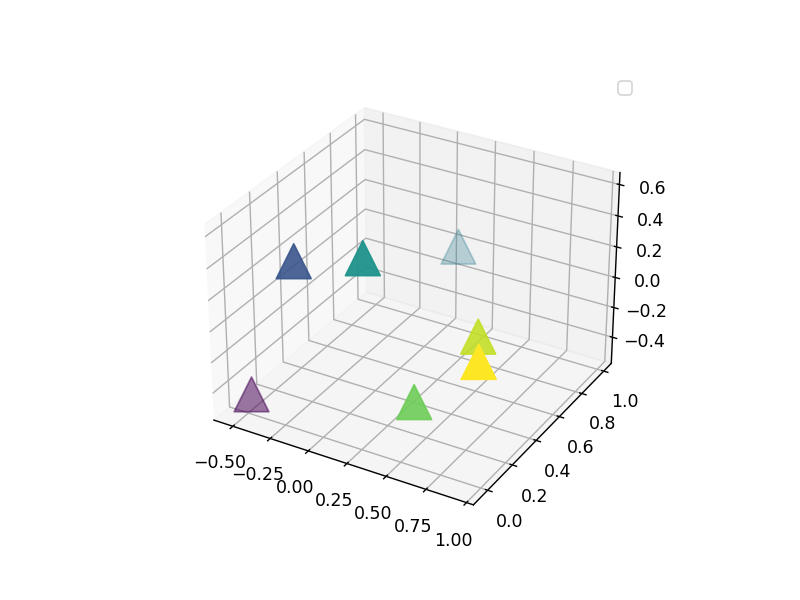

No handles with labels found to put in legend.


In [34]:
%matplotlib notebook


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(
    coef_d1, 
    coef_d2, 
    coef_d3, s=400, c=coef_d1, marker='^');

ax.legend()

In [35]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']
